In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1

(1)Find x(t) using the second‐order Runge‐Kutta method with h=0.01

In [3]:
def f(t,x):
    return t + 2*x*t

Text(0, 0.5, 'x(t)')

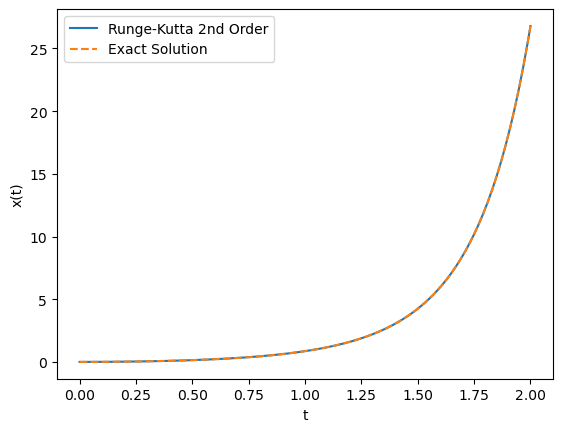

In [4]:
h = 0.01
x_2 = np.zeros(201)
t = np.arange(0, 2 + h, h)
for i in range(200):
    k1 = f(t[i], x_2[i])
    k2 = f(t[i] + h, x_2[i] + h * k1)
    x_2[i + 1] = x_2[i] + (k1 + k2) * h / 2

plt.plot(t, x_2, label='Runge-Kutta 2nd Order')
plt.plot(t, np.exp(t**2)/2-1/2, label='Exact Solution', linestyle='--')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')

(2) Find x(t) using the fourth‐order Runge‐Kutta method with h=0.01

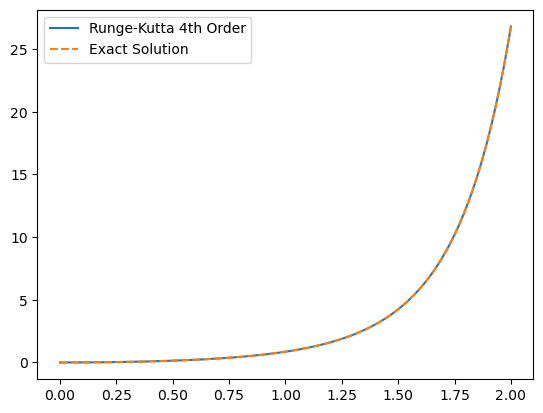

In [5]:
h = 0.01
x_4 = np.zeros(201)
t = np.arange(0, 2 + h, h)
for i in range(200):
    k1 = f(t[i], x_4[i])
    k2 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k1)
    k3 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k2)
    k4 = f(t[i] + h, x_4[i] + h * k3)
    x_4[i + 1] = x_4[i] + (k1 + 2*k2 + 2*k3 + k4) * h / 6

plt.plot(t, x_4, label='Runge-Kutta 4th Order')
plt.plot(t, np.exp(t**2)/2-1/2, label='Exact Solution', linestyle='--')
plt.legend()

(3) (1)과 (2)의 solution을 exact solution 𝟏
1/2(e^t^2-1) 과 비교하여 각 RK method에 대한 order of
accuracy를 분석하시오.

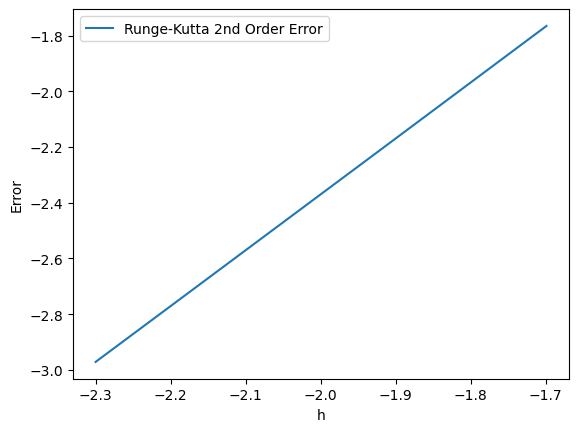

In [6]:
error_2_list = []
h_list = []
# a는 구간 개수
for a in range(100, 400):
    h = 2 / a
    x_2 = np.zeros(a + 1)
    t = np.linspace(0, 2, a + 1)
    for i in range(a):
        k1 = f(t[i], x_2[i])
        k2 = f(t[i] + h, x_2[i] + h * k1)
        x_2[i + 1] = x_2[i] + (k1 + k2) * h / 2
    error_2 = (np.sum(( x_2 - (np.exp(t**2)/2 - 1/2))**2)*h)**0.5
    error_2_list.append(error_2)
    h_list.append(h)

plt.figure()
plt.plot(np.log10(h_list), np.log10(error_2_list), label='Runge-Kutta 2nd Order Error')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()



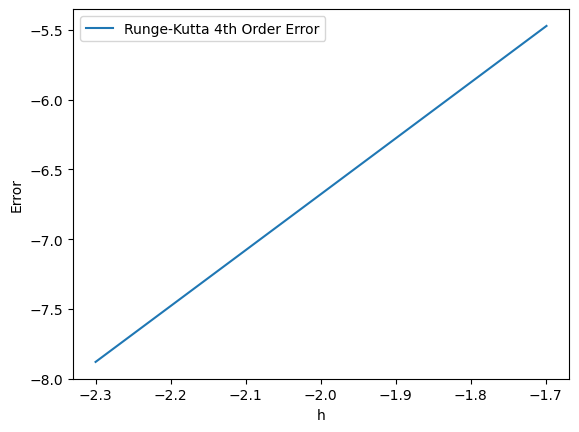

In [7]:
error_4_list = []
for a in range(100, 400):
    h = 2 / a
    x_4 = np.zeros(a + 1)
    t = np.linspace(0, 2, a + 1)
    for i in range(a):
        k1 = f(t[i], x_4[i])
        k2 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k1)
        k3 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k2)
        k4 = f(t[i] + h, x_4[i] + h * k3)
        x_4[i + 1] = x_4[i] + (k1 + 2*k2 + 2*k3 + k4) * h / 6
    error_4 = (np.sum(( x_4 - (np.exp(t**2)/2 - 1/2))**2)*h)**0.5
    error_4_list.append(error_4)

plt.figure()
plt.plot(np.log10(h_list), np.log10(error_4_list), label='Runge-Kutta 4th Order Error')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()

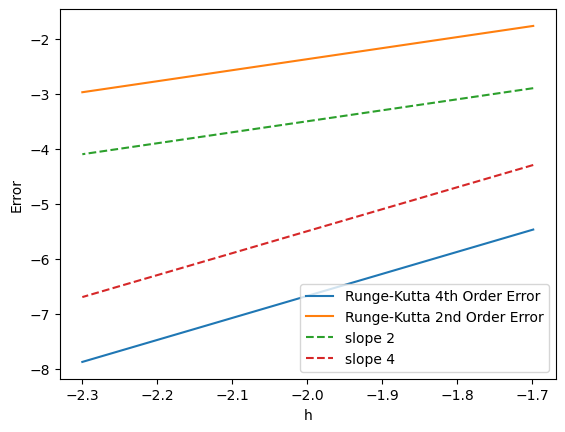

In [8]:
plt.figure()
plt.plot(np.log10(h_list), np.log10(error_4_list), label='Runge-Kutta 4th Order Error')
plt.plot(np.log10(h_list), np.log10(error_2_list), label='Runge-Kutta 2nd Order Error')
plt.plot(np.log10(h_list), np.log10(h_list)*2 + 0.5, label='slope 2', linestyle='--')
plt.plot(np.log10(h_list), np.log10(h_list)*4 + 2.5, label='slope 4', linestyle='--')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()

(4) step size h의 영향을 4th order RK method를 사용하여 분석하시오. (Hint : t=2에서의 error 분석을 진행하면 되며, 다른 step size h=0.01,0.05,0.1에 대한 분석을 진행하도록 하시오.)

In [9]:
h = 0.01
x_4 = np.zeros(201)
t = np.arange(0, 2 + h, h)
for i in range(200):
    k1 = f(t[i], x_4[i])
    k2 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k1)
    k3 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k2)
    k4 = f(t[i] + h, x_4[i] + h * k3)
    x_4[i + 1] = x_4[i] + (k1 + 2*k2 + 2*k3 + k4) * h / 6

abs(x_4[-1]-(np.exp(t[-1]**2)/2 - 1/2))


7.558046171141086e-07

In [10]:
error_list = []
for h in [0.01, 0.05, 0.1]:
    x_4 = np.zeros(int(2/h) + 1)
    t = np.arange(0, 2 + h, h)
    for i in range(len(t) - 1):
        k1 = f(t[i], x_4[i])
        k2 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k1)
        k3 = f(t[i] + 1/2 * h, x_4[i] + 1/2 * h * k2)
        k4 = f(t[i] + h, x_4[i] + h * k3)
        x_4[i + 1] = x_4[i] + (k1 + 2*k2 + 2*k3 + k4) * h / 6
    error = abs(x_4[-1] - (np.exp(t[-1]**2)/2 - 1/2))
    print(f"Error for h={h}: {error}")
    error_list.append(error)

error_list = np.array(error_list)
h_list = np.array([0.01, 0.05, 0.1])
print(error_list[1:]/error_list[:-1])
print(h_list[1:]**4/h_list[:-1]**4)

Error for h=0.01: 7.558046171141086e-07
Error for h=0.05: 0.0004238786017687346
Error for h=0.1: 0.005920666257274831
[560.83092399  13.96783474]
[625.  16.]


# 2

(1) 4th order RK method를 사용하여 위 6개 방정식을 계산하는 코드를 만드시오. t=0일 때의 초기조
건은 𝒙(𝟎) = 𝟎, 𝒚(𝟎) = 𝟎, 𝒛(𝟎) = 𝒉, 𝒗𝒙 = 𝒗𝟎𝒄𝒐𝒔𝜽, 𝒗𝒚 = 𝟎, 𝒗𝒛 = 𝒗𝟎𝒔𝒊𝒏𝜽 로 주어지며, 𝒗𝟎는 투구의 초기
속도를 의미하며, 𝜽는 투구의 상승각도를 의미하고 h는 지상에서 공을 놓는 위치까지의 수직 높이를 의미한다. 본 문제에서는 공이 포수의 위치인 x(t) =18.39m 까지 도달하도록 방정식을 계산하도록 한다. 코드를 만들어 나가는 과정에 대해서 서술하시오.

In [11]:
B = 4.1 * 10**-4
W = 1800 * 2*np.pi / 60  # Convert RPM to rad/s
g = 9.81  # Acceleration due to gravity

In [12]:
def F(V):
    return 0.0039 + 0.0058/(1+np.exp((V-35)/5))

def u_t(u,v,w,pi):
    return -F((u**2+v**2+w**2)**0.5) * (u**2+v**2+w**2)**0.5 * u + B * W *(w*np.sin(pi) - v*np.cos(pi))

def v_t(u,v,w,pi):
    return -F((u**2+v**2+w**2)**0.5) * (u**2+v**2+w**2)**0.5 * v + B * W *u*np.cos(pi)

def w_t(u,v,w,pi):
    return -g -F((u**2+v**2+w**2)**0.5) * (u**2+v**2+w**2)**0.5 * w - B * W *u*np.sin(pi) 

In [13]:
# 속도 RK
def RK4_u(u,v,w,pi,t_h):
    u_k1 = u_t(u,v,w,pi)
    v_k1 = v_t(u,v,w,pi)
    w_k1 = w_t(u,v,w,pi)
    
    u_k2 = u_t(u+t_h/2*u_k1,v+t_h/2*v_k1,w+t_h/2*w_k1,pi)
    v_k2 = v_t(u+t_h/2*u_k1,v+t_h/2*v_k1,w+t_h/2*w_k1,pi)
    w_k2 = w_t(u+t_h/2*u_k1,v+t_h/2*v_k1,w+t_h/2*w_k1,pi)
    
    u_k3 = u_t(u+t_h/2*u_k2,v+t_h/2*v_k2,w+t_h/2*w_k2,pi)
    v_k3 = v_t(u+t_h/2*u_k2,v+t_h/2*v_k2,w+t_h/2*w_k2,pi)
    w_k3 = w_t(u+t_h/2*u_k2,v+t_h/2*v_k2,w+t_h/2*w_k2,pi)

    u_k4 = u_t(u+t_h/2*u_k3,v+t_h/2*v_k3,w+t_h/2*w_k3,pi)
    v_k4 = v_t(u+t_h/2*u_k3,v+t_h/2*v_k3,w+t_h/2*w_k3,pi)
    w_k4 = w_t(u+t_h/2*u_k3,v+t_h/2*v_k3,w+t_h/2*w_k3,pi)
    
    return u + (u_k1 + 2*u_k2 + 2*u_k3 + u_k4) * t_h / 6 , v + (v_k1 + 2*v_k2 + 2*v_k3 + v_k4) * t_h / 6, w + (w_k1 + 2*w_k2 + 2*w_k3 + w_k4) * t_h / 6 

In [14]:
def RK4_x(x,y,z,u,v,w,pi,t_h):
    x_k1 = u
    y_k1 = v
    z_k1 = w

    x_k2 = RK4_u(u,v,w,pi,t_h/2)[0]
    y_k2 = RK4_u(u,v,w,pi,t_h/2)[1]
    z_k2 = RK4_u(u,v,w,pi,t_h/2)[2]

    x_k3 = x_k2
    y_k3 = y_k2
    z_k3 = z_k2

    x_k4 = RK4_u(u,v,w,pi,t_h)[0]
    y_k4 = RK4_u(u,v,w,pi,t_h)[1]
    z_k4 = RK4_u(u,v,w,pi,t_h)[2]    

    return x + (x_k1 + 2*x_k2 + 2*x_k3 + x_k4) * t_h / 6, y + (y_k1 + 2*y_k2 + 2*y_k3 + y_k4) * t_h / 6, z + (z_k1 + 2*z_k2 + 2*z_k3 + z_k4) * t_h / 6, x_k4, y_k4, z_k4

In [32]:
# Fastball
x_fast = [0]
y_fast = [0]
z_fast = [1.7]
u_fast = [40*np.cos(np.deg2rad(1))]
v_fast = [0]
w_fast = [40*np.sin(np.deg2rad(1))]
while x_fast[len(x_fast)-1] < 18.39:
    x_m,y_m,z_m,u_m,v_m,w_m=RK4_x(x_fast[len(x_fast)-1], y_fast[len(y_fast)-1], z_fast[len(z_fast)-1], u_fast[len(u_fast)-1], v_fast[len(v_fast)-1], w_fast[len(w_fast)-1], np.deg2rad(225), 0.0001)
    x_fast.append(x_m)
    y_fast.append(y_m)
    z_fast.append(z_m)
    u_fast.append(u_m)
    v_fast.append(v_m)
    w_fast.append(w_m)


In [33]:
# Curveball
x_curve = [0]
y_curve = [0]
z_curve = [1.7]
u_curve = [30*np.cos(np.deg2rad(1))]
v_curve = [0]
w_curve = [30*np.sin(np.deg2rad(1))]

while x_curve[len(x_curve)-1] < 18.39:
    x_m,y_m,z_m,u_m,v_m,w_m=RK4_x(x_curve[len(x_curve)-1], y_curve[len(y_curve)-1], z_curve[len(z_curve)-1], u_curve[len(u_curve)-1], v_curve[len(v_curve)-1], w_curve[len(w_curve)-1], np.deg2rad(45), 0.0001)
    x_curve.append(x_m)
    y_curve.append(y_m)
    z_curve.append(z_m)
    u_curve.append(u_m)
    v_curve.append(v_m)
    w_curve.append(w_m)


In [34]:
# Slider
x_slider = [0]
y_slider = [0]
z_slider = [1.7]
u_slider = [30*np.cos(np.deg2rad(1))]
v_slider = [0]
w_slider = [30*np.sin(np.deg2rad(1))]

while x_slider[len(x_slider)-1] < 18.39:
    x_m,y_m,z_m,u_m,v_m,w_m=RK4_x(x_slider[len(x_slider)-1], y_slider[len(y_slider)-1], z_slider[len(z_slider)-1], u_slider[len(u_slider)-1], v_slider[len(v_slider)-1], w_slider[len(w_slider)-1], np.deg2rad(0), 0.0001)
    x_slider.append(x_m)
    y_slider.append(y_m)
    z_slider.append(z_m)
    u_slider.append(u_m)
    v_slider.append(v_m)
    w_slider.append(w_m)

In [35]:
# Screwball
x_screw = [0]
y_screw = [0]
z_screw = [1.7]
u_screw = [30*np.cos(np.deg2rad(1))]
v_screw = [0]
w_screw = [30*np.sin(np.deg2rad(1))]

while x_screw[len(x_screw)-1] < 18.39:
    x_m,y_m,z_m,u_m,v_m,w_m=RK4_x(x_screw[len(x_screw)-1], y_screw[len(y_screw)-1], z_screw[len(z_screw)-1], u_screw[len(u_screw)-1], v_screw[len(v_screw)-1], w_screw[len(w_screw)-1], np.deg2rad(135), 0.0001)
    x_screw.append(x_m)
    y_screw.append(y_m)
    z_screw.append(z_m)
    u_screw.append(u_m)
    v_screw.append(v_m)
    w_screw.append(w_m)

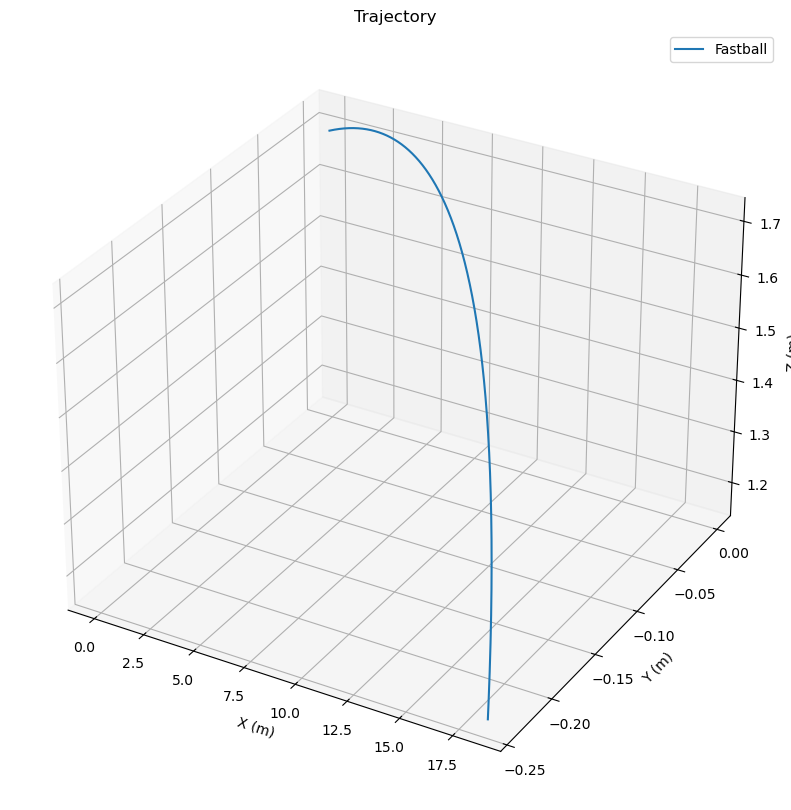

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_fast, y_fast, z_fast, label='Fastball')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Trajectory')
ax.legend()
plt.show()

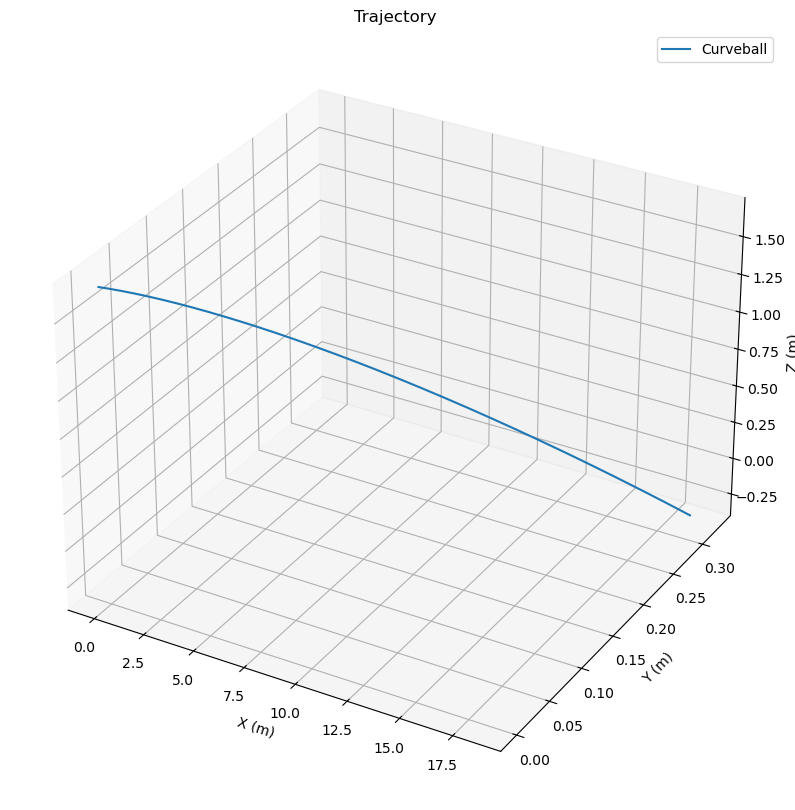

In [37]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_curve, y_curve, z_curve, label='Curveball')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Trajectory')
ax.legend()
plt.show()

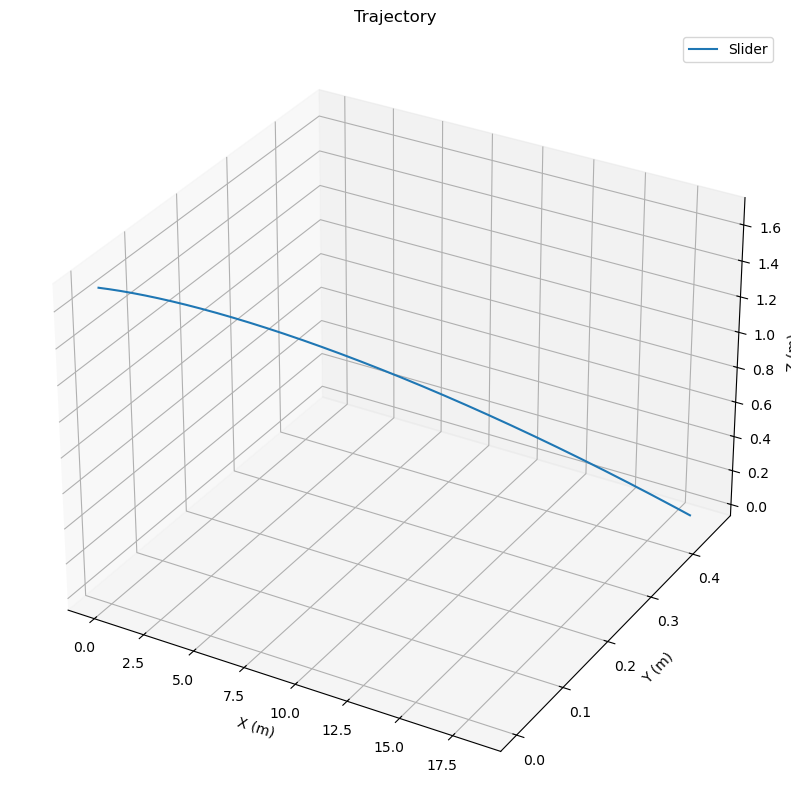

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_slider, y_slider, z_slider, label='Slider')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Trajectory')
ax.legend()
plt.show()

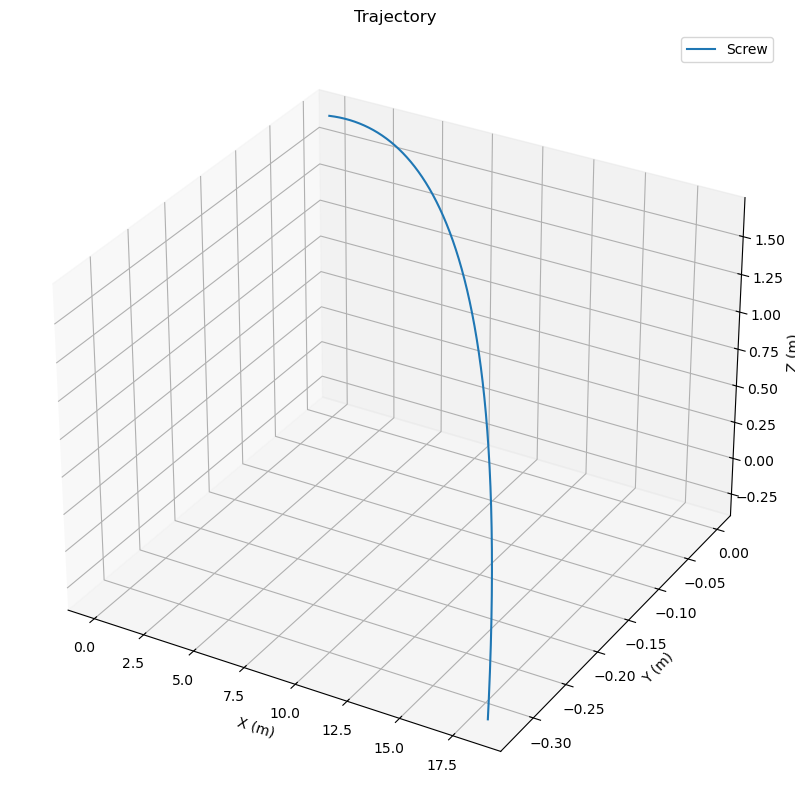

In [39]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_screw, y_screw, z_screw, label='Screw')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Trajectory')
ax.legend()
plt.show()

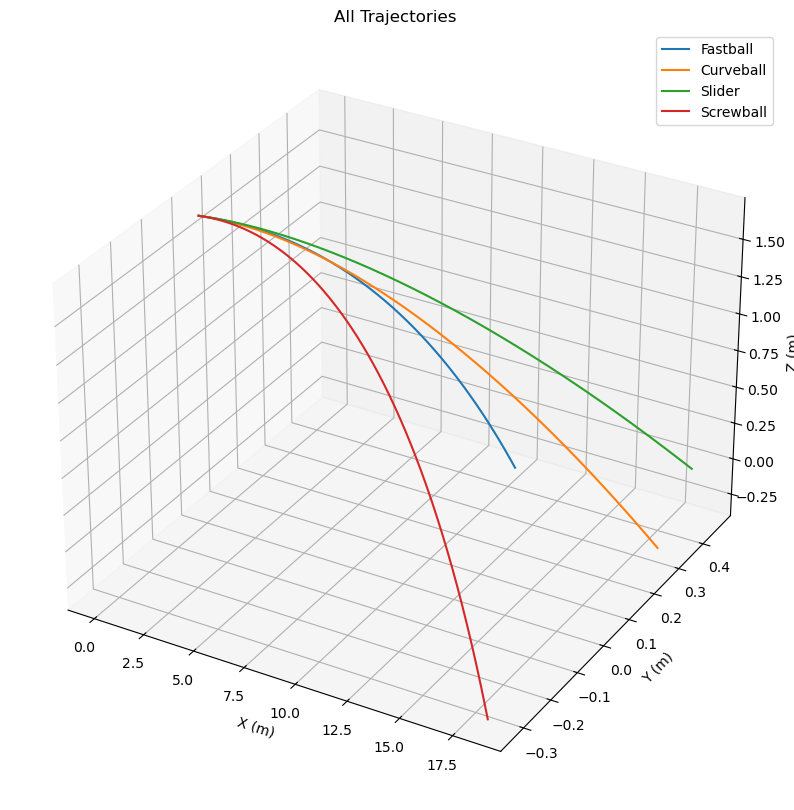

In [40]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_fast, y_fast, z_fast, label='Fastball')
ax.plot(x_curve, y_curve, z_curve, label='Curveball')
ax.plot(x_slider, y_slider, z_slider, label='Slider')
ax.plot(x_screw, y_screw, z_screw, label='Screwball')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('All Trajectories')
ax.legend()
plt.show()